In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from Backend import read_txt

loc = r'D:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\NO2'

In [3]:
dark1 = read_txt(rf'{loc}\dark1.txt')
dark2 = read_txt(rf'{loc}\dark2.txt')
ref1 = read_txt(rf'{loc}\ref1.txt')
ref2 = read_txt(rf'{loc}\ref2.txt')
dark = {dark1['integration_time']: dark1['intensity'], dark2['integration_time']: dark2['intensity']}
ref = {ref1['integration_time']: ref1['intensity'], ref2['integration_time']: ref2['intensity']}


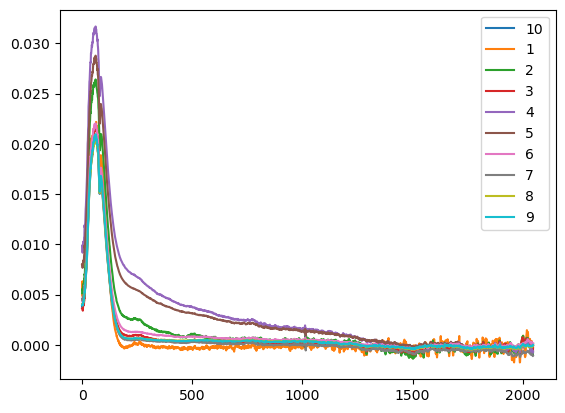

In [26]:
uno = {}
dos = {}
files = os.scandir(loc)
for file in files:
    if '_' not in file.name:
        continue
    data = read_txt(file.path)
    rel_measurement = data['intensity'] - dark[data['integration_time']]
    rel_measurement = rel_measurement / rel_measurement.max()
    rel_reference = ref[data['integration_time']] - dark[data['integration_time']]
    rel_reference = rel_reference / rel_reference.max()
    absorption = -np.log10(rel_measurement / rel_reference)
    number = int(file.name.split('_')[0])
    if data['integration_time'] == 10:
        uno[number] = absorption
    elif data['integration_time'] == 100:
        dos[number] = absorption
    
plt.figure()
for key, value in uno.items():
    plt.plot(value/int(key), label=key)
plt.legend()
plt.show()

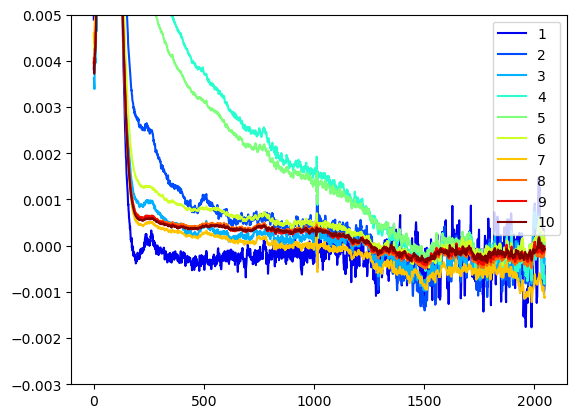

In [27]:
cmap = plt.get_cmap('jet')

plt.figure()
for key, value in sorted(uno.items(), key=lambda x: x[0]):
    plt.plot(value/int(key), label=key, color=cmap(key/10))
plt.legend()
plt.ylim(-0.003, 0.005)
plt.show()